<a href="https://colab.research.google.com/github/johnsigma/meuPortifolio/blob/master/Analisando_os_Dados_do_Airbnb(Sydney).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sydney*

Pequena análise de dados do Airbnb da cidade de Sydney. Esse artigo é o primeiro projeto do curso Data Science na Prática do blog [sigmoidal.ai](https://sigmoidal.ai), do professor Carlos Melo.

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Sydney da Autrália, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Sydney" width="75%" src="https://image.freepik.com/free-vector/dark-skyline-design-sydney_23-2147767850.jpg"></center>

## Obtenção dos Dados
Os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise utilizamos o seguinte arquivo:
* listings.csv - *Summary information and metrics for listings in Sydney (good for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/australia/nsw/sydney/2020-05-09/visualisations/listings.csv')

## Análise dos Dados
 Etapa que tem por objetivo entender a situação inicial e entender como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipe de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que o imóvel possui
* `last_review` - data do último review
* `reviews_per_mouth` quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponabilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,64,2,196,2020-03-13,1.54,1,363
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14315,2,526,2019-09-22,4.41,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,5,2,2019-01-02,0.04,2,141
3,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,100,2,364,2020-03-17,3.64,1,344
4,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,131,3,76,2020-01-03,0.65,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A seguir vamos identificar quantas entradas (linhas) que nosso conjunto de dados possui e ver os tipos de cada caluna.

O *dataset* utilizado é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` há
 uma versão mais completa com mais colunas (106) (`listings.csv.gz`).

In [7]:
# identificar o volume de dados do DataFrame
print(f'Entradas (linhas):\t {df.shape[0]}')
print(f'Variáveis (colunas):\t {df.shape[1]} \n')

# verificar as entradas do dataset
display(df.dtypes)

Entradas (linhas):	 37562
Variáveis (colunas):	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quanto mais valores ausentes (nulos) possui o *dataset*, menor sua qualidade. É importante, antes de fazer uma análise mais profunda, verificar se esses valores nulos são significativos comparados ao número de entradas (linhas).

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_mouth` e `last_review` possuem valores nulos em quase 30% das linhas.
* As variáveis `name` e `host_name` têm menos de 0,1% dos valores nulos.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.276476
last_review                       0.276476
name                              0.000319
host_name                         0.000080
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Podemos plotar um histograma para identificar a distribuição das variáveis.

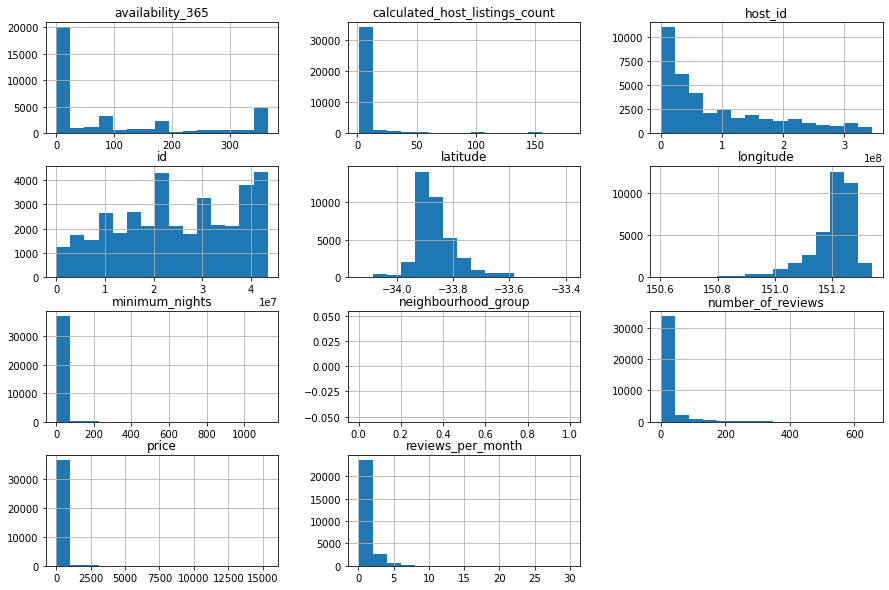

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Podemos ver a média dos preços dos alugueis.

Como nossa análise é mais básica não estamos fazendo um tratamento para valores *outliers*, que são valores extremos que podem distorcer as análises feitas com os dados (como a média). 

In [13]:
# ver a média da coluna `price``
print('Média dos preços dos alugueis: {:.2f}'.format(df["price"].mean()))

Média dos preços dos alugueis: 228.38


### **Q4. Qual a correlação existente entre as variáveis**

Queremos agora buscar relações ou semelhanças entre duas variáveis (colunas). Chamamos isso de correlação.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intesidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [16]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.002731,-0.036580,-0.034128,0.312951,0.144029
minimum_nights,-0.002731,1.000000,-0.027766,-0.041561,0.037383,0.032308
number_of_reviews,-0.036580,-0.027766,1.000000,0.739443,-0.041681,0.168439
reviews_per_month,-0.034128,-0.041561,0.739443,1.000000,0.004312,0.191791
calculated_host_listings_count,0.312951,0.037383,-0.041681,0.004312,1.000000,0.246581
availability_365,0.144029,0.032308,0.168439,0.191791,0.246581,1.000000


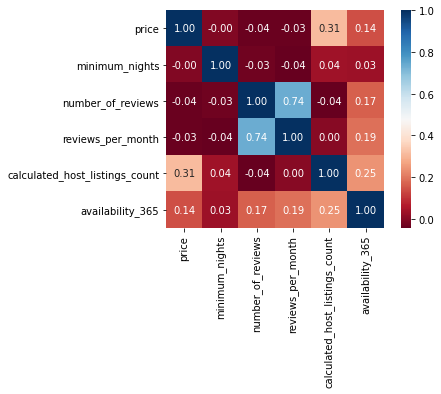

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Vamos agora analisar qual o tipo de imóvel mais alugado no Airbnb. A coluna `room_type` indica o tipo do quarto/imóvel que está anunciado no Airbnb.

Há quatro tipos de locação possíveis de se anunciar, são elas:

* *Private room* - Apenas um quarto privado.
* *Entire home/apt* - O imóvel (casa/apartamento) inteiro.
* *Shared room* - Quarto compartilhado.
* *Hotel room* - Quarto de hotel

In [19]:
# mostrar quais tipos de locação estão disponíveis
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    23215
Private room       13355
Shared room          712
Hotel room           280
Name: room_type, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.618045
Private room       0.355545
Shared room        0.018955
Hotel room         0.007454
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Sydney?**

Vamos agora comparar os bairros (*neighbourhood*) a partir do preço de locação dos imóveis. Para isso vamos usar a função `groupby()`, que verifica uma variável em função de outra.



In [22]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater       559.905772
Mosman          477.184314
Hunters Hill    325.574074
Woollahra       321.892834
Manly           320.718318
Warringah       275.716518
Holroyd         272.524272
Botany Bay      248.202899
Waverley        244.856806
Lane Cove       239.072785
Name: price, dtype: float64

Acima, vemos que os bairro Pittwater, Mosman, Hunters Hill são os mais caros (na média) de Sydney.

Uma observação válida aqui é que essa análise foi feita sem desconsiderar os dados *outliers* e sem levar levar em consideração a proporção de entradas por preço dos imóveis. Então se for feita uma análise tocando nos pontos mencionados a tabela acima pode sofrer alterações.

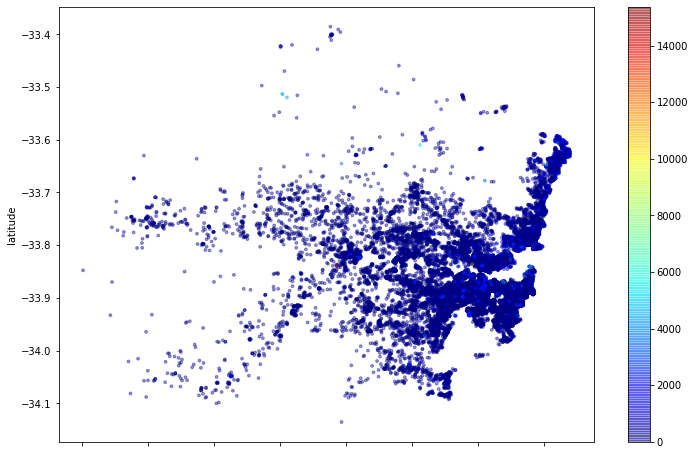

In [24]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'],
  s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));


Acima plotamos um gráfico pela latitude e longitude dos imóveis anunciados e fizemos os imóveis serem coloridos de acordo com o preço.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A seguir vemos que os imóveis anunciados para locação têm em média 6 noites mínimas para alugar. 

In [26]:
# ver a média da coluna `minimum_nights``
print('Média do mínimo de noites para se alugar um imóvel: {:.2f}'.format(df.minimum_nights.mean()))

Média do mínimo de noites para se alugar um imóvel: 5.43


## Conclusões


Em conclusão, foi feita uma análise superficial na base de dados do Airbnbn, não levamos em consideração os valores *outliers* que podem diferenciar os *outputs* desta análise em questão.

Por fim, lembre-se que este *dataset* é uma versão resumida dos imóveis cadastrados no Airbnb para a cidade de Sydney. Para uma análise mais exploratória e profunda, recomenda-se utilizar o conjunto de dados completos com todos os seus atributos.